# Develop a neural Network that can read handwriting

## Author :- Janvi Gulhane

## Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

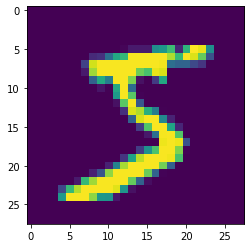

In [3]:
mnist = tf.keras.datasets.mnist #28X28 images of hand-written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])

In [4]:
# checking the shape of x_test and y_test
x_test.shape
y_test.shape

(10000,)

In [5]:
# checking the shape of x_train and y_train
x_train.shape
y_train.shape

(60000,)

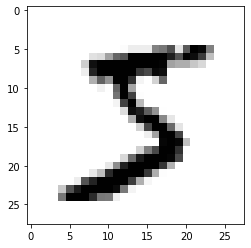

In [6]:
# ploting x_train
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
# Normalizeing the x_train and x_test:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
print(x_train[0])  #values changed between 0 - 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

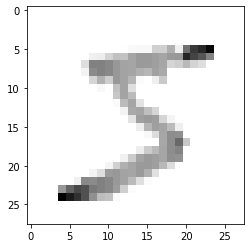

In [9]:
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

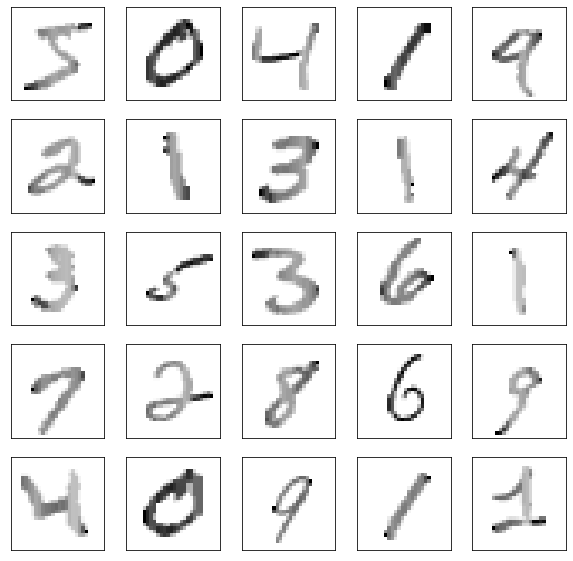

In [10]:
# ploting the first 25 images from the dataset
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

In [11]:
# rechecking the values with y_train
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

C:\Users\Janvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

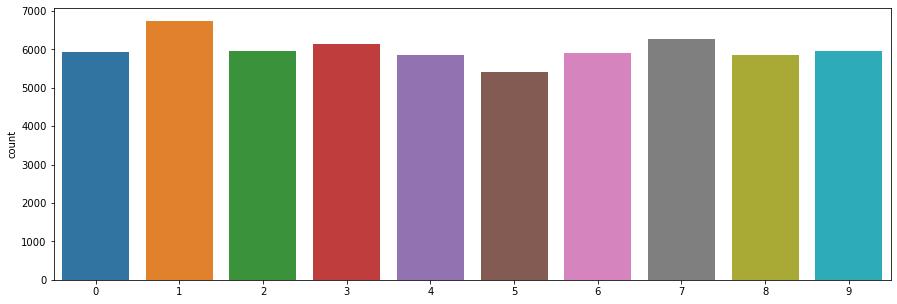

In [12]:
# plotting the counts of digits from 0-9 
plt.figure(figsize = (15,5))
sns.countplot(y_train)

In [13]:
# Keras and tensorflow liabrary
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))  #Rectified Linear Unit activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) 

In [14]:
model.compile(optimizer ='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - accuracy: 0.9222
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9671
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9773
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9832
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9869
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9890
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9923


### Here we reacted to the accuracy of 99% which in itself is a huge achievment.

In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9753
0.09728584438562393 0.9753000140190125


In [18]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [19]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [20]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [21]:
print(predictions)

[[5.2440038e-11 1.6056617e-10 2.5225049e-08 ... 9.9999595e-01
  9.7462635e-11 7.3054818e-10]
 [3.6863819e-12 1.5718460e-06 9.9999845e-01 ... 3.5531352e-11
  8.7412211e-10 4.4698455e-17]
 [3.6927284e-12 9.9999046e-01 2.2473873e-08 ... 1.3463978e-06
  5.4403463e-06 6.0153549e-11]
 ...
 [2.3600800e-11 2.8363911e-09 8.8623990e-11 ... 8.5816350e-09
  4.2385636e-08 5.5527966e-07]
 [1.6668238e-14 8.1525903e-10 1.8325660e-10 ... 3.4510284e-11
  3.0305478e-04 1.1886022e-13]
 [5.9804570e-09 3.4901301e-11 4.1851120e-08 ... 9.5773019e-14
  2.3679112e-09 4.8529094e-11]]


In [22]:
print(np.argmax(predictions[0]))

7


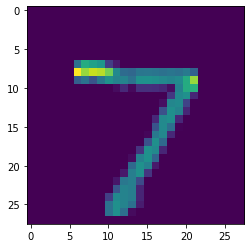

In [23]:
plt.imshow(x_test[0])
plt.show()

1


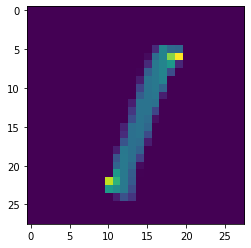

In [24]:
print(np.argmax(predictions[5]))
plt.imshow(x_test[5])
plt.show()